In [5]:
%matplotlib inline

from dicom_utils import *
import numpy as np 
import pandas as pd 
import os
import pydicom
import matplotlib.pyplot as plt
#import assd_func as af
from skimage import morphology
import matplotlib.patches as mpatches
import assd_func_Sobel_2 as af_Sobel
from parameter_tuning_func import *

In [6]:
dicom_dir = "1"
output_dir = "Output"
images, slices, contours, labels, dummy_mask = main(dicom_dir, output_dir)

In [3]:
contour_table = pd.DataFrame()
number = []
name = []
for i in range(24):
    number.append(contours[i]["number"])
    name.append(contours[i]["name"])
#contour_table["number"] = number
contour_table["name"] = name

In [4]:
contour_table

,name
0,marked iso
1,a prostate
2,b SV
3,PTV
4,d rectum
5,e bladder
6,f Femural Heads
7,g nt avoid
8,fiducials
9,p ring


# Bladder

In [5]:
#Find location of the contour where labels == 5 (bladder)
a = np.argwhere(labels==True)
a[a[..., 3] == 5][0]

array([ 73, 231, 250,   5], dtype=int64)

(-0.5, 511.5, 511.5, -0.5)

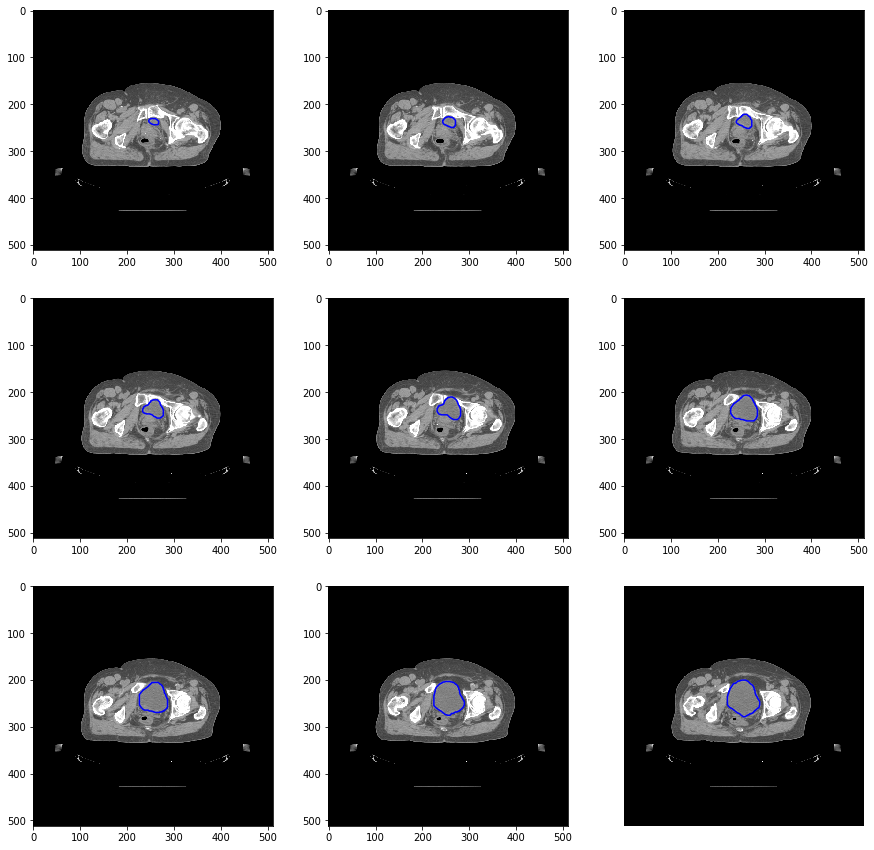

In [6]:
plt.figure(figsize=(15, 15))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i + 73, ...], cmap="gray", vmin=-250, vmax=250)
    plt.contour(labels[..., 5][i + 73, ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
plt.axis('off')

# Sobel and 3D Permutation

In [3]:
import random
from scipy.stats import uniform,norm

In [7]:
target_img1 = images[75, ...]
target_label1 = labels[..., 5][75, ...]

# Making output contour from the seed consistent

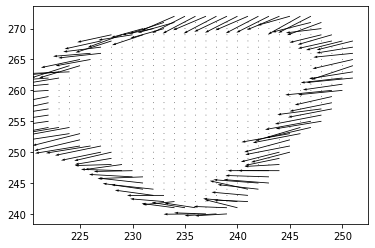

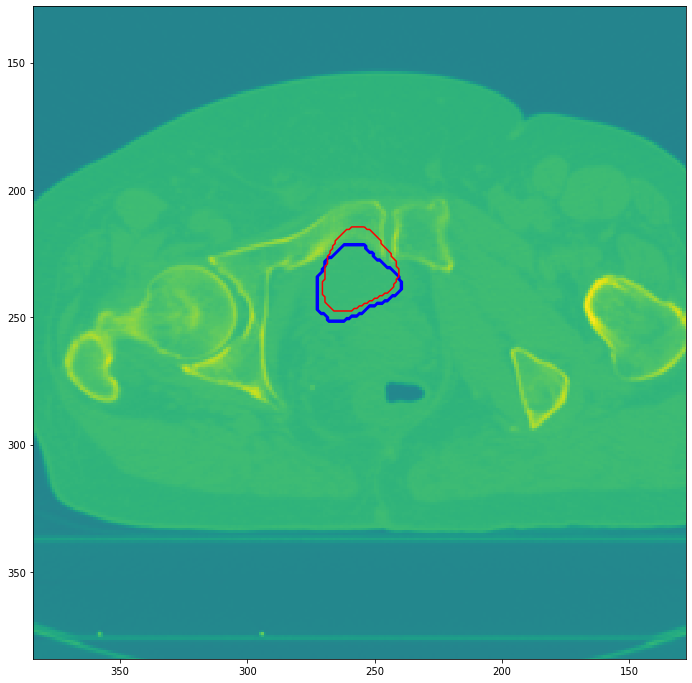

In [8]:
# roi = target_label*target_img
a=50
#voxelsize = np.array([0.488281, 0.488281, 1.25])
voxelsize = np.array([0.976562, 0.976562, 2.5])
c = 30
SD=[c*1.7, c*2, c*2.5]
w = 2
k = 45
circles = 3
organ_id = 5
seed=123
dx, dy, mask, t1, L1, roi_z = af_Sobel.assd_Sobel(target_img1, target_label1, voxelsize, a, SD, circles, seed, k, w, images, labels, organ_id, smooth=True)
du_1 = af_Sobel.plotting_assd(dx, dy, mask, target_img1, quiver=True, plot=True, display=True)

# Paremeter Experimentation

# 1. Different c*SD

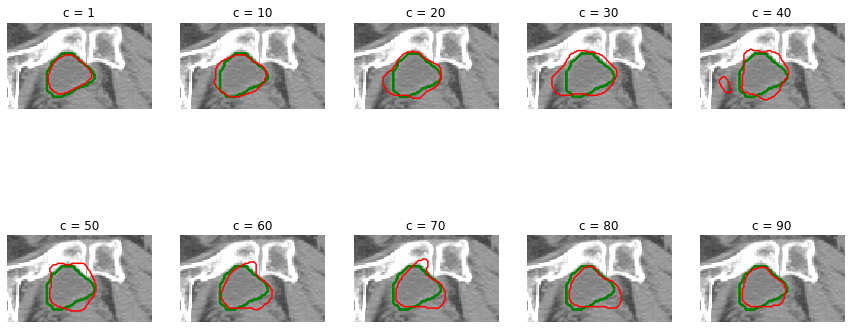

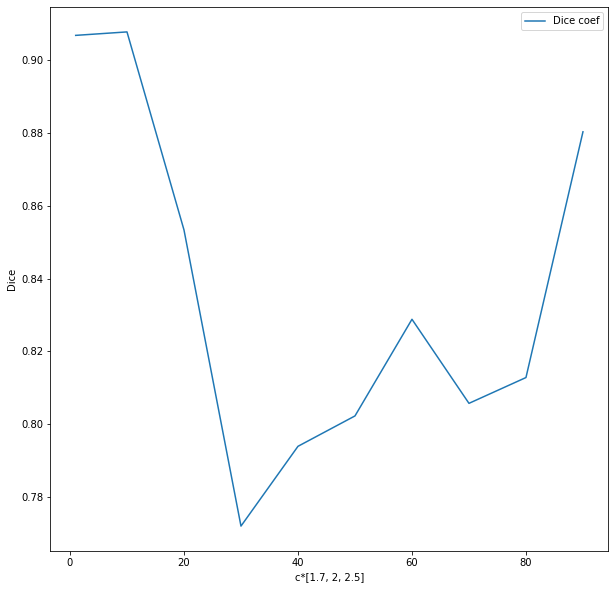

In [10]:
c_list = [1, 10, 20, 30, 40, 50, 60,70, 80, 90]
SD = [0.7, 0.7, 3]
organ_id=5
df = find_c(target_img1, target_label1, images, labels, c_list, SD, organ_id, xlim = [300, 200], ylim = [260, 200], plot_dice=True)

# Different k working with best c*SD

In [ ]:
k_list = [5, 15, 25, 30, 45, 50, 60, 75]
c = 10
df = find_k(target_img1, target_label1, images, labels, k_list, c, SD, organ_id, df, xlim = [300, 200], ylim = [260, 200], plot_dice=True)
#df.write_csv(destination_path + "Dice_log_Rectum.csv")

10*[1.7, 2, 2.5]


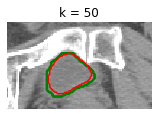

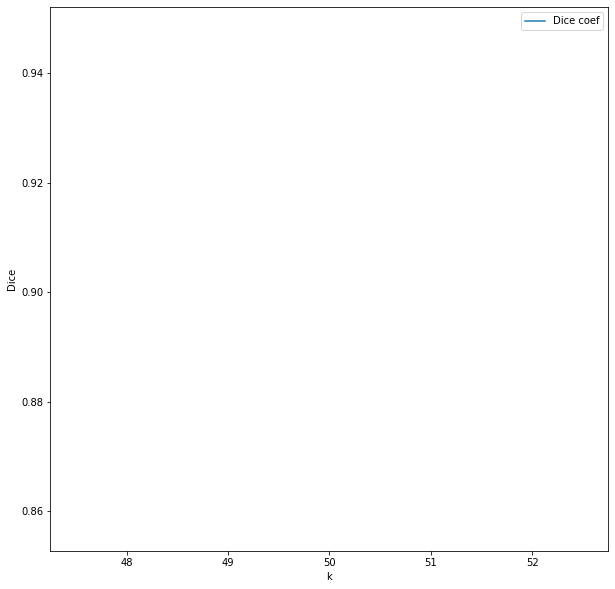

In [16]:
k_list = [50]
c = 10
seed=3400
df = find_k(target_img1, target_label1, images, labels, k_list, c, SD, organ_id, df, xlim = [300, 200], ylim = [260, 200], plot_dice=True)
#df.write_csv(destination_path + "Dice_log_Rectum.csv")

20*[1.7, 2, 2.5]


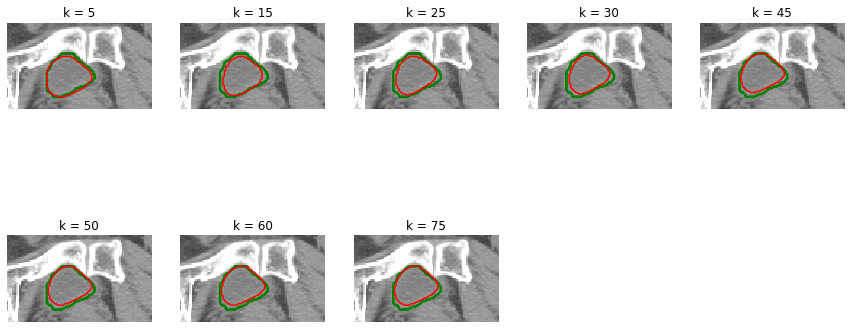

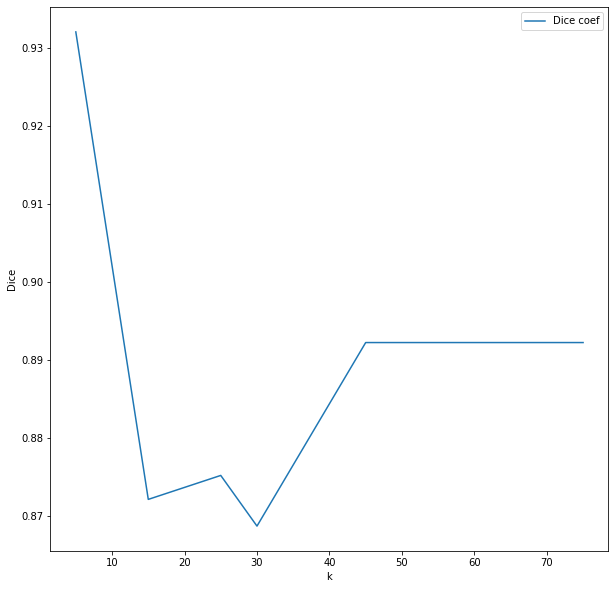

In [12]:
k_list = [5, 15, 25, 30, 45, 50, 60, 75]
c = 20
df = find_k(target_img1, target_label1, images, labels, k_list, c, SD, organ_id, df, xlim = [300, 200], ylim = [260, 200], plot_dice=True)
#df.write_csv(destination_path + "Dice_log_Rectum.csv")

90*[1.7, 2, 2.5]


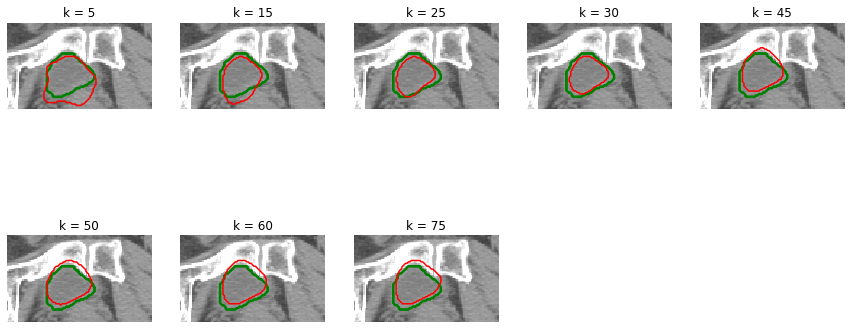

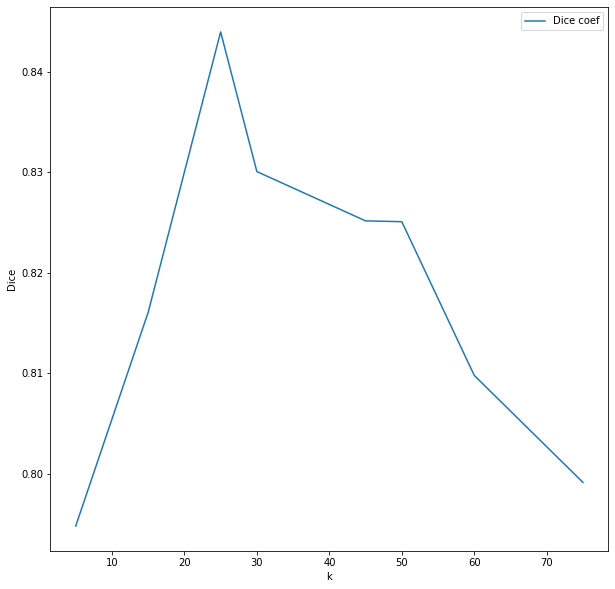

In [13]:
k_list = [5, 15, 25, 30, 45, 50, 60, 75]
c = 90
df = find_k(target_img1, target_label1, images, labels,k_list, c, SD, organ_id,df, xlim = [300, 200], ylim = [260, 200], plot_dice=True)
#df.write_csv(destination_path + "Dice_log_Rectum.csv")

# Different ismax working with best w, k and c*SD

SD: 10*[1.7, 2, 2.5]
k: 50


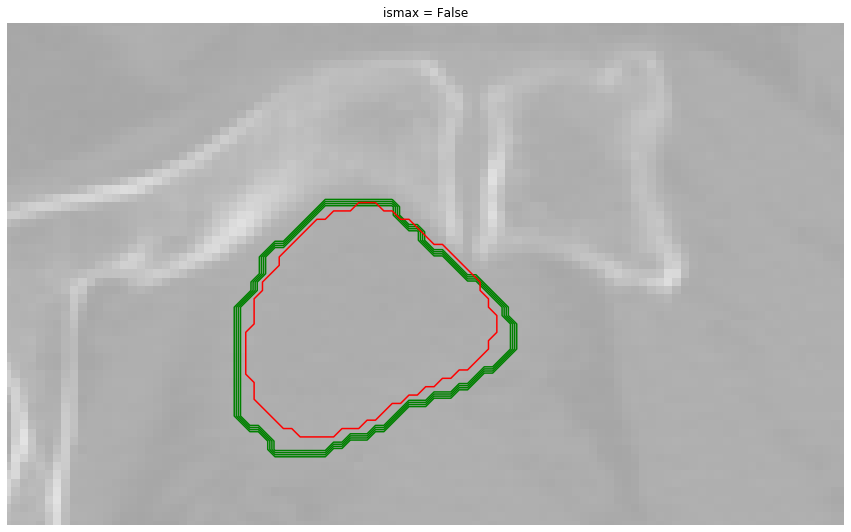

In [11]:
w = 2
k = 50
c = 10
df = a_find_ismax(target_img1, target_label1, images, labels, w, k, c, SD, organ_id, df, xlim = [300, 200], ylim = [260, 200], ismax=False, plot_dice=True)

SD: 20*[1.7, 2, 2.5]
k: 60


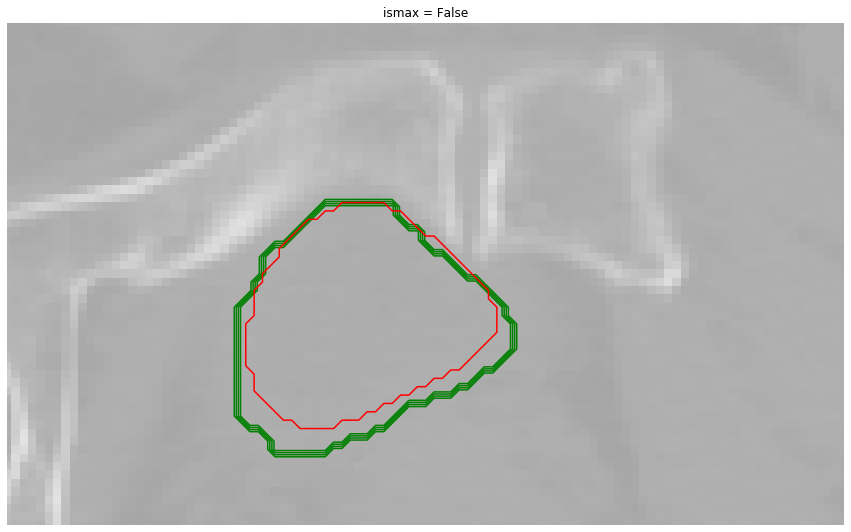

In [12]:
w = 2
k = 60
c = 20
df = a_find_ismax(target_img1, target_label1, images, labels, w, k, c, SD, organ_id, df, xlim = [300, 200], ylim = [260, 200], ismax=False, plot_dice=True)

SD: 90*[1.7, 2, 2.5]
k: 25


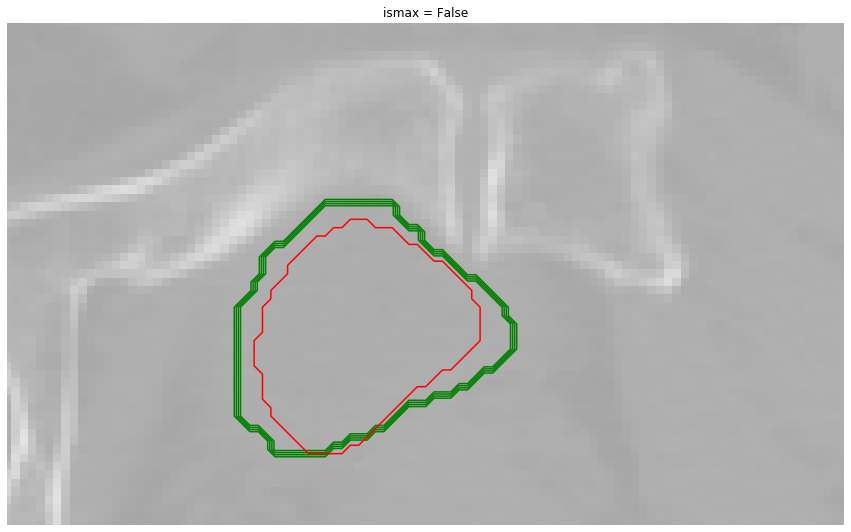

In [13]:
w = 2
k = 25
c = 90
df = a_find_ismax(target_img1, target_label1, images, labels, w, k, c, SD, organ_id, df, xlim = [300, 200], ylim = [260, 200], ismax=False, plot_dice=True)

SD: 90*[1.7, 2, 2.5]
k: 30


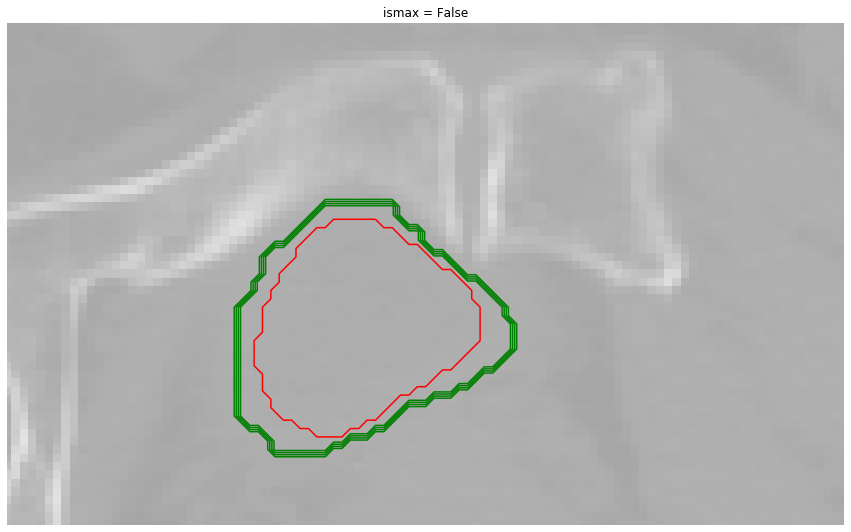

In [14]:
w = 2
k = 30
c = 90
df = a_find_ismax(target_img1, target_label1, images, labels, w, k, c, SD, organ_id, df, xlim = [300, 200], ylim = [260, 200], ismax=False, plot_dice=True)

SD: 90*[1.7, 2, 2.5]
k: 45


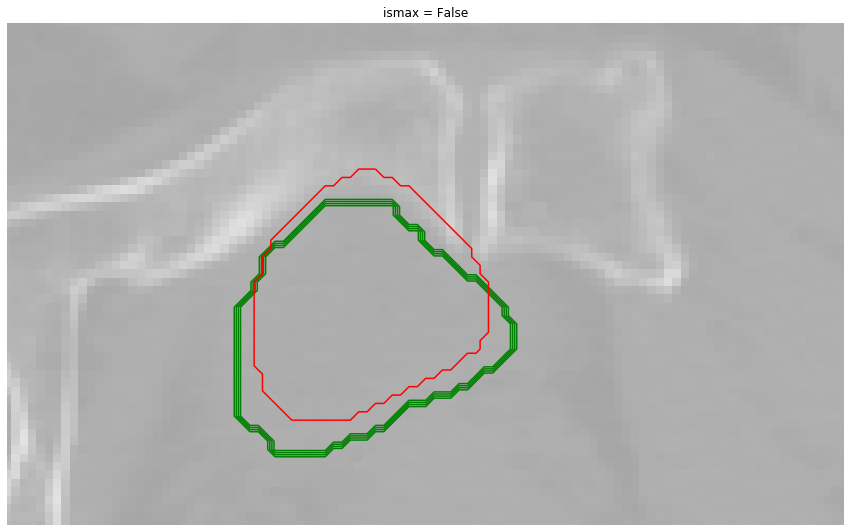

In [20]:
w = 2
k = 45
c = 90
df = a_find_ismax(target_img1, target_label1, images, labels, w, k, c, SD, organ_id, df, xlim = [300, 200], ylim = [260, 200], ismax=False, plot_dice=True)

SD: 90*[1.7, 2, 2.5]
k: 50


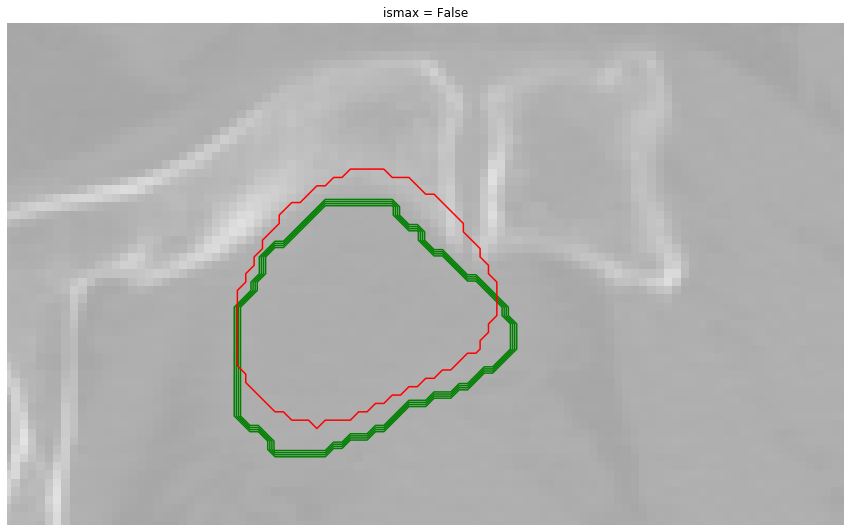

In [22]:
w = 2
k = 50
c = 90
df = a_find_ismax(target_img1, target_label1, images, labels, w, k, c, SD, organ_id, df, xlim = [300, 200], ylim = [260, 200], ismax=False, plot_dice=True)

SD: 90*[1.7, 2, 2.5]
k: 60


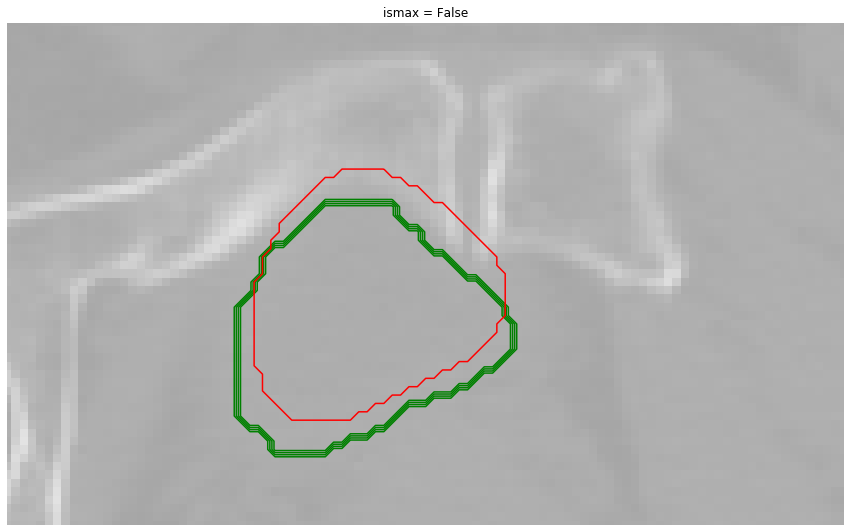

In [24]:
w = 2
k = 60
c = 90
df = a_find_ismax(target_img1, target_label1, images, labels, w, k, c, SD, organ_id, df, xlim = [300, 200], ylim = [260, 200], ismax=False, plot_dice=True)

SD: 90*[1.7, 2, 2.5]
k: 75


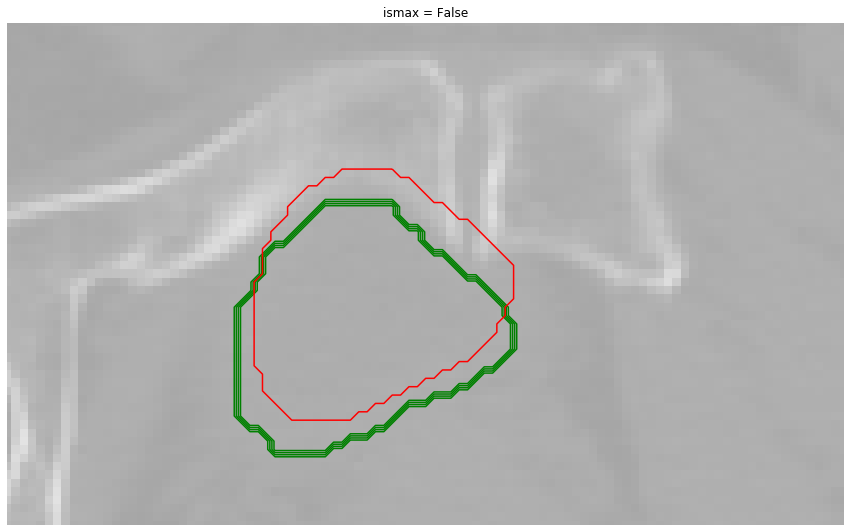

In [15]:
w = 2
k = 75
c = 90
df = a_find_ismax(target_img1, target_label1, images, labels, w, k, c, SD, organ_id, df, xlim = [300, 200], ylim = [260, 200], ismax=False, plot_dice=True)

# Best set of parameters on different slide

In [20]:
roi_number = 5 #bladder
assd_contour_bladder = a_different_slices(images, labels, roi_number, roi_z, SD, c, k, w, organ_id, ismax=False, xlim = [200, 300], ylim = [300, 200], plot=True)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\73707\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-20-057b6efd779d>", line 2, in <module>
    assd_contour_rectum = a_different_slices(images, labels, roi_number, roi_z, SD, c, k, w, organ_id, ismax=False, xlim = [200, 300], ylim = [300, 200], plot=True)
  File "<ipython-input-19-ed552b6e4cbb>", line 10, in a_different_slices
    dx, dy, mask, t, L, roi_z = af_Sobel.assd_Sobel(images[i, ...], labels[..., roi_number][i, ...], voxelsize, a, SD, circles, seed, k, w, images, labels, organ_id, smooth=True)
  File "C:\Users\73707\contour_segmation\assd_func_Sobel_2.py", line 317, in assd_Sobel
    i0 = find_i0(images, labels, roi_z, surface_cord, L, voxelsize, roi, ismax)
  File "C:\Users\73707\contour_segmation\assd_func_Sobel_2.py", line 201, in find_i0
    z_list, avg_grad_surface_list = find_z_list(images, labels, roi_z,

KeyboardInterrupt: 

In [2]:
def a_find_ismax(target_img1, target_label1, images, labels, w, k, c, SD_0, organ_id, df, xlim=[300, 190], ylim=[300, 190], ismax=False, plot_dice=True):
    print("SD: " + str(c) + "*[1.7, 2, 2.5]")
    print("k: " + str(k))
    dice_list = []
    a=50
    voxelsize = np.array([0.976562, 0.976562, 2.5])
    circles = 3
    seed=123
    w = w
    c = c
    SD=[c*SD_0[0], c*SD_0[1], c*SD_0[2]]
    k = k
    plt.figure(figsize=(15, 15))

    #df = pd.DataFrame(columns = ['k', 'c', 'w', 'min/max', "dice"]) 
    dx, dy, mask, t1, L1, roi_z = af_Sobel.assd_Sobel(target_img1, target_label1, voxelsize, a, SD, circles, seed, k, w, images, labels, organ_id, ismax=ismax, smooth=True)
    du1 = af_Sobel.plotting_assd(dx, dy, mask, target_img1, quiver=False, plot=False)
    dice = dice_coef(du1, target_label1, 1)
    dice_list.append(dice)
    df = create_log(df, c, k, w, ismax, dice)
    plt.imshow(target_img1, cmap="gray")
    plt.contour(mask, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="green")
    plt.contour(du1, levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
    plt.xlim(xlim[0], xlim[1])
    plt.ylim(ylim[0], ylim[1])
    if ismax:
        plt.title("ismax = True")
    else:
        plt.title("ismax = False")
    plt.axis('off')
        
    return df

In [15]:
def a_different_slices(images, labels, roi_number, roi_z, SD_0, c, k, w, organ_id, ismax=False, xlim = [200, 300], ylim = [300, 200], plot=True):
    a=50
    voxelsize = np.array([0.976562, 0.976562, 2.5])
    circles = 3
    seed=123
    SD=[c*SD_0[0], c*SD_0[1], c*SD_0[2]]
    assd_contour_rectum = labels[..., roi_number].copy()

    for i in roi_z:
        dx, dy, mask, t, L, roi_z = af_Sobel.assd_Sobel(images[i, ...], labels[..., roi_number][i, ...], voxelsize, a, SD, circles, seed, k, w, images, labels, organ_id, smooth=True)
        du = af_Sobel.plotting_assd(dx, dy, mask, target_img1, quiver=False, plot=False)
        assd_contour_rectum[i, ...] = du 
    assd_contour = np.array(assd_contour_rectum)
    if plot:
        plt.figure(figsize=(15, 15))
        for i in range(9):
            plt.subplot(3, 3, i + 1)
            plt.imshow(images[roi_z[i] , ...], cmap="gray", vmin=-250, vmax=250)
            plt.contour(assd_contour_rectum[roi_z[i], ...], levels = [0.5, 1.5, 2.5, 3.5, 4.5], colors="red")
            plt.contour(labels[..., roi_number][roi_z[i], ...], levels=[0.5, 1.5, 2.5, 3.5, 4.5], colors="blue")
            plt.xlim(xlim[0], xlim[1])
            plt.ylim(ylim[0], ylim[1])
            blue_patch = mpatches.Patch(color='blue', label="Clinician's contour")
            red_patch = mpatches.Patch(color='red', label='DU contour with random seed 1')
            plt.legend(handles=[ blue_patch, red_patch])
        plt.axis('off')
    
    return assd_contour